### Execute the cell below before proceeding.

The code in this cell will download a file with a Python script from the Internet. Make sure that you have a network connection before executing it. 

In [1]:
%matplotlib notebook
import requests
with open("orientation.py", 'w') as foo:
    foo.write(requests.get("https://git.io/fjjyS").text)
from orientation import *

# Sign of a determinant

Let ${\bf v}_1$ and ${\bf v}_2$ be two vectors in $\mathbb{R}^2$, and let $M$ be the $2\times 2$ matrix with 
${\bf v}_1$ and ${\bf v}_2$ as columns:

$$M = \begin{bmatrix}{\bf v}_1 & {\bf v}_2 \end{bmatrix}$$

Recall that the sign of the determinant of $M$ can be interpreted as follows:

- If the vector ${\bf v}_2$ is positioned in the counterclockwise direction from ${\bf v}_1$ then $\det M > 0$. 
- If the vector ${\bf v}_2$ is positioned in the clockwise direction from ${\bf v}_1$ then $\det M < 0$. 

<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2019/master/notebooks/orientation1.svg?sanitize=true" style="width:650px; border:0px">

The function below displays an interactive plot which shows how the sign of the determinant changes depending on the position of the two vectors:

<IPython.core.display.Javascript object>


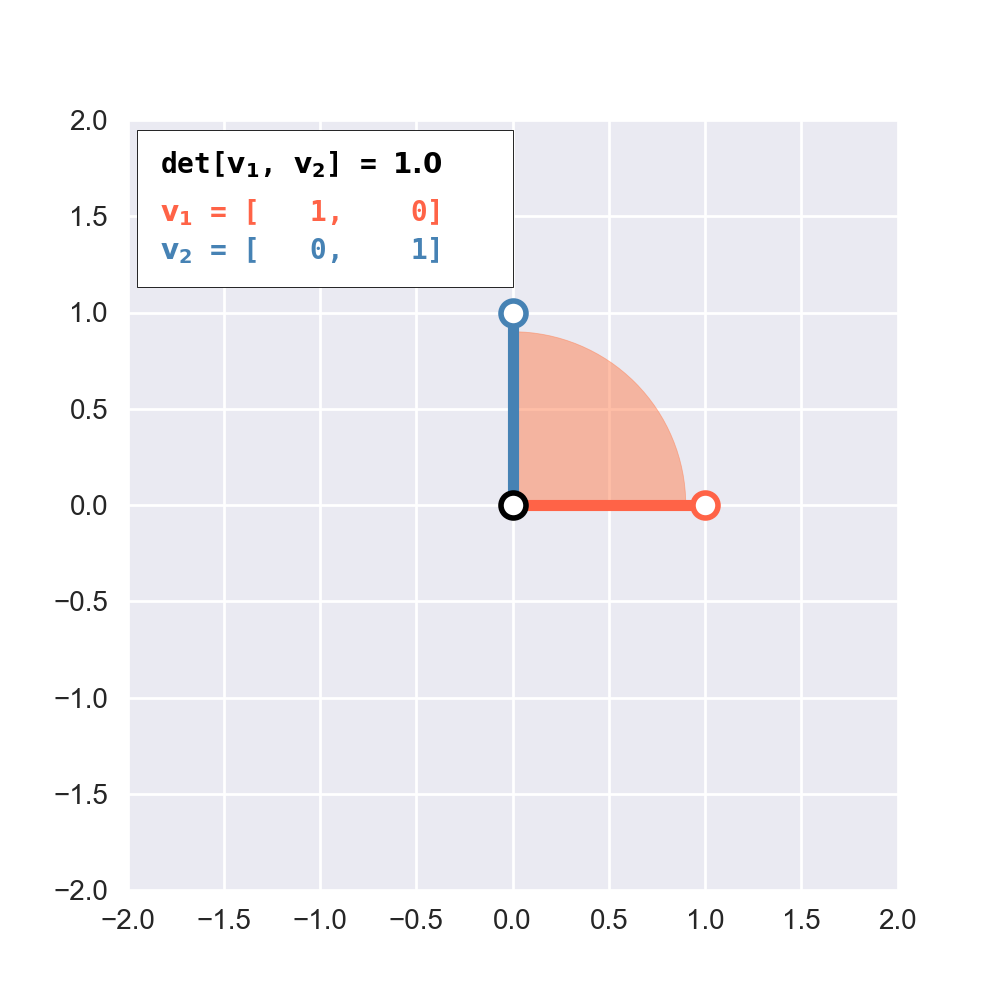

In [4]:
det_sign()

This property of determinants has several applications in geometry and, in particular, it is often used in computations related to computer graphics. A few such applications are described below. 

## 1. Sides of a line

For any two points $A$, $B$ on a plane there is a unique straight line passing through these points. Such line divides the plane into two half-planes. If $X$, $Y$ are points which do not belong to the line, then we can ask if these points are on the same side of the line (i.e. they belong to the same half-plane), or it they are on different sides. 

<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2019/master/notebooks/orientation7.svg?sanitize=true" style="width:450px; border:0px">


This problem can be solved as follows. 

* Let ${\bf v }_{AB}$ denote the vector which starts at the point $A$ and ends at the point $B$. Similarly, denote by ${\bf v }_{AX}$  the vector which starts at $A$ and ends at $X$, and by ${\bf v }_{AY}$ the vector which starts 
at $A$ and ends at $Y$. 

* Let $M_X$, $M_Y$ be the $2\times 2$ matrices given by 

$$M_X = \begin{bmatrix}{\bf v }_{AB} & {\bf v }_{AX} \end{bmatrix}
\hskip 10mm
M_Y = \begin{bmatrix}{\bf v }_{AB} & {\bf v }_{AY} \end{bmatrix}$$
  
* If signs of $\det M_X$ and $\det M_Y$ are the same, then $X$ and $Y$ are on the same side of the line. If these determinants have different signs then these points are on different sides. 

<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2019/master/notebooks/orientation2.svg?sanitize=true" style="width:450px; border:0px">

This procedure works, because all vectors starting at the point $A$ and ending on one side of the line are positioned in the clockwise direction from the vector ${\bf v }_{AB}$, while all vectors starting at $A$ and ending on the opposite side of the line are positioned in the counterclockwise direction from ${\bf v }_{AB}$. 

### Example

In the picture above we have:

$$A = (-1, 0),\ \ \ \ B = (4, 2),\ \ \ \ X = (0, 3),\ \ \ \ Y = (2, -1)$$

This gives:

$$
{\bf v}_{AB}
=
\begin{bmatrix}
5 \\
2 \\
\end{bmatrix},
\hskip 5mm
{\bf v}_{AX}
=
\begin{bmatrix}
1 \\
3 \\
\end{bmatrix},
\hskip 5mm
{\bf v}_{AY}
=
\begin{bmatrix}
\phantom{-}3 \\
-1 \\
\end{bmatrix}
$$

Therefore 

$$
\det M_X
= 
\det
\begin{bmatrix}
5 & 1 \\
2 & 3 \\
\end{bmatrix}
= 13
\hskip 10mm
\det M_Y
= 
\det
\begin{bmatrix}
5 & \phantom{-}3 \\
2 & -1 \\
\end{bmatrix}
= -11
$$

Since these two determinants have different signs, points $X$ and $Y$ are on different sides of the line passing through the points $A$ and $B$.

## Interactive plotting

Execute the cell below to display an interactive plot. Click on the plot repeatedly to select points. The first two points will define a straight line. Subsequent points will be colored either red or green depending on which side of the line they are located. The color of each point is selected based on the determinant computation described above. The value of the determinant for each new point is shown in the upper left corner. The reset button clears all points. 


<IPython.core.display.Javascript object>


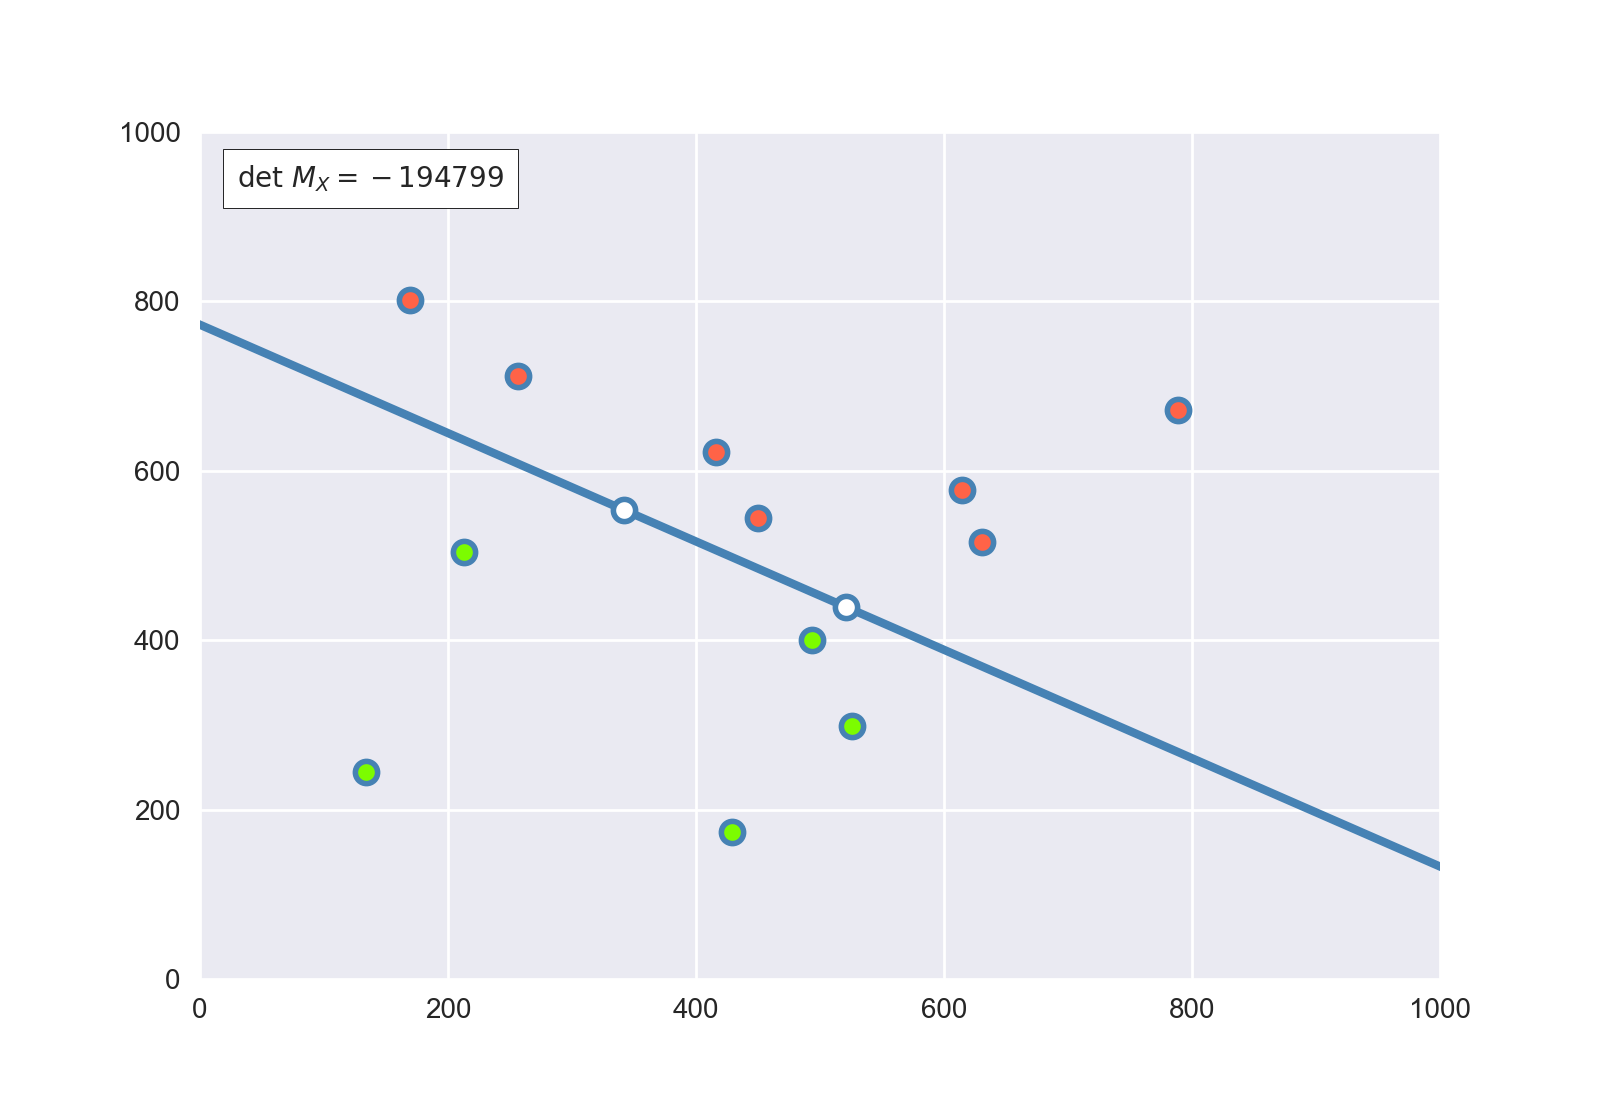

Button(description='Reset', style=ButtonStyle())

In [2]:
colored_points()

## 2. Intersection of  line segments

Let $A$, $B$, $C$, $D$ be points on the plane. Let $AB$ denote the line segment joining the points 
$A$ and $B$ and $CD$ be the line segment joining the points $C$ and $D$: 

<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2019/master/notebooks/orientation3.svg?sanitize=true" style="width:350px; border:0px">

We can determine is the line segments $AB$ and $CD$ intersect or not as follows:

* Check if the points  $A$ and $B$ are on different sides of the line passing through $C$ and $D$.
* Check if the points  $C$ and $D$ are on different sides of the line passing through $A$ and $B$.

We can verify these conditions using the procedure described in Part 1. 
If both of these conditions are satisfied then the line segments intersect. 

## 3. Detecting points inside a triangle. 

Let $A$, $B$, $C$ be points on the plane forming a triangle. Given a point $X$, we can determine if this point is inside or outside of the triangle as follows. 

* Check if the points $X$ and  $A$ on the same side of the line passing through $B$ and $C$.
* Check if the points $X$ and  $B$ on the same side of the line passing through $A$ and $C$.
* Check if the points $X$ and  $C$ on the same side of the line passing through $A$ and $B$.

<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2019/master/notebooks/orientation4.svg?sanitize=true" style="width:350px; border:0px">

We can use the procedure described in Part 1 to verify these conditions.
If all of these conditions are satisfied then the point $X$ is inside the triangle 
$ABC$. Otherwise it is outside.

## 4. Detecting points inside a polygon


Let $P$ be a polygon on the plane with some number of vertices, and let $X$ be point on the plane. 
We can determine if $X$ is inside or outside of the polygon as follows. 

* Select a point $Y$ which is outside of the polygon (for example, you can pick a point whose $x$-cordinate is larger than $x$-coordinates of all vertices of the polygon)
* Check how many sides of the polygon are intersected by the line segment $XY$ (we can do it using the method from  Part 2). 

If the number of sides intersecting with $XY$ is odd, then the point $X$ is inside the polygon. Otherwise $X$ is outside.

<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2019/master/notebooks/orientation5.svg?sanitize=true" style="width:300px; border:0px">

**Note:** In order to complete this procedure we also need to specify how to handle two special cases:

1. It may happen that the line segment $XY$ passes though a vertex of the polygon. 
2. It may also happen a part of the segment $XY$ overlaps with one of the edges of the polygon. 


<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2019/master/notebooks/orientation6.svg?sanitize=true" style="width:600px; border:0px">

In the first case, we look at the two vertices of the polygon (marked blue in the picture) neighboring the intersecting vertex. If these vertices are on the same side of the line $XY$, we count the intersection point as a double intersection. If they are on the different sides, we count it as a single intersection. 

The second case is similar. We look at the two vertices of the polygon (marked blue in the picture) that are neighboring the intersecting edge. Again, we count the intersection as either a double or a single intersection depending if these vertices are on the same side or different sides of the line $XY$.